# Data Assembly I Lab

### So far we have taken for granted that the data we required to carry out our analysis was available to us in a convenient format (e.g. csv). That is usually not the case, data sources are scattered around the organization (or the internet) and require prior processing before the analysis can take place.

### In this lab, and the following one, we will learn: (1) how to fetch external data using standard methods, (2) how to combine several datasets into a single one ready for analysis.

## This session will cover:

1. Fetch data from external datasources using Application Programming Interfaces (API)
2. Basic merging 


## 1. Let's load and install some libraries

### 1.1. Open Air Quality Data (OpenAQ)


#### Air pollution is the 4th largest risk factor to human health on the planet. According to the World Health Organization, more than 90% of the world breathes unhealthy air, and air pollution disproportionately affects those in developing countries.

#### OpenAQ is a non-profit organization empowering communities around the globe to clean their air by harmonizing, sharing, and using open air quality data.
#### OpenAQ maintains a repository consisted of air quality data from 130 different countries and primarily aggregate PM2.5, PM10, ozone (O3), sulfur dioxide (SO2), nitrogen dioxide(NO2), carbon monoxide (CO), and black carbon (BC) measurements. Additional pollutants outside of those standard set of pollutants are now available through low cost sensor sources at certain locations.





### 1.2.OpenAQ API


#### OPenAQ makes its data available online through an Application Programming Interface (API) that allows us to fetch the data.
#### We need to install a library called py-openaq to be able to use the API

In [ ]:
!pip install py-openaq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=1d8c1bc59813082e0f669b53aceb7f4b5471c48a1bd9873bdb69b4cbfd25c3b4
  Stored in directory: /root/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import openaq

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
import warnings
warnings.filterwarnings('ignore')


### 1.3 It is always a good idea to test the API first, just to make sure it is working

In [ ]:
api = openaq.OpenAQ()

status, resp = api.cities(limit=5)

In [ ]:
status

200

In [ ]:
resp

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0d',
  'website': 'api.openaq.org',
  'page': 1,
  'limit': 5,
  'found': 3179,
  'pages': 636},
 'results': [{'country': 'US',
   'name': '007',
   'city': '007',
   'count': 32871,
   'locations': 6},
  {'country': 'US',
   'name': '019',
   'city': '019',
   'count': 2112,
   'locations': 1},
  {'country': 'US',
   'name': '037',
   'city': '037',
   'count': 36774,
   'locations': 23},
  {'country': 'US',
   'name': '039',
   'city': '039',
   'count': 1140,
   'locations': 1},
  {'country': 'US',
   'name': '047',
   'city': '047',
   'count': 36111,
   'locations': 4}]}

### 1.4.  Let's make our second API call
#### This time we want the data in pandas format

In [ ]:
cities = api.cities(df=True)


In [ ]:
cities.head(3)

,country,name,city,count,locations
0,US,007,007,32871,6
1,US,019,019,2112,1
2,US,037,037,36774,23


### 1.4. Let's make our third API call
#### Which countries are included in the database ?

In [ ]:
countries = api.countries( df=True)

In [ ]:
countries

,code,count,locations,cities,name
0,AD,671265,3,2,Andorra
1,AE,15815498,11,2,United Arab Emirates
2,AF,2294724,3,2,Afghanistan
3,AJ,4960,10,1,AJ
4,AL,60588,17,0,Albania
...,...,...,...,...,...
152,VN,57550301,57,2,Vietnam
153,XK,9414949,31,8,Kosovo
154,ZA,67848281,437,31,South Africa
155,ZM,7889778,3,0,Zambia


### 1.5. Let's make our fourth API call
#### Let's fetch information on the parameters included in the database

In [ ]:
parameters = api.parameters(df=True)

parameters

,id,name,description,preferredUnit
0,1,pm10,Particulate matter less than 10 micrometers in...,µg/m³
1,2,pm25,Particulate matter less than 2.5 micrometers i...,µg/m³
2,3,o3,Ozone mass concentration,µg/m³
3,4,co,Carbon Monoxide mass concentration,µg/m³
4,5,no2,Nitrogen Dioxide mass concentration,µg/m³
5,6,so2,Sulfur Dioxide mass concentration,µg/m³
6,7,no2,Nitrogen Dioxide concentration,ppm
7,8,co,Carbon Monoxide concentration,ppm
8,9,so2,Sulfur Dioxide concentration,ppm
9,10,o3,Ozone concentration,ppm


### 1.6. Let's make our fifth API call
#### Let's fetch information about the locations

In [ ]:
locations = api.locations(df=True)

locations.head(3)

,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.latitude,coordinates.longitude
0,3956,HU,Pest,"[Hungarian Air Quality Network, Pest]",HU0032A,"[HU0032A, Szazhalombatta]",EEA Hungary,[EEA Hungary],government,[government],2016-12-12 14:00:00+00:00,2022-10-03 09:00:00+00:00,"[pm10, co, no2, o3, so2]","[{'parameter': 'pm10', 'count': 103136}, {'par...",486037,47.30667,18.92000
1,5240,AR,Buenos Aires,[Buenos Aires],LA BOCA,[LA BOCA],Buenos Aires,[Buenos Aires],government,[government],2017-08-10 23:00:00+00:00,2022-10-03 09:00:00+00:00,"[no2, pm10, co]","[{'parameter': 'no2', 'count': 27297}, {'param...",81774,-34.62527,-58.36555
2,5241,AR,Buenos Aires,[Buenos Aires],CORDOBA,[CORDOBA],Buenos Aires,[Buenos Aires],government,[government],2017-08-10 23:00:00+00:00,2022-10-03 09:00:00+00:00,"[no2, pm10, co]","[{'parameter': 'no2', 'count': 27258}, {'param...",81789,-34.60442,-58.39165


### 1.6. Let's make our sixth API call
#### Let's fetch data from the city of London

In [ ]:
London = api.measurements(city='London', limit=10000, df=True)

In [ ]:
London

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-10-03 09:00:00,London Hillingdon,pm10,15.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-03 08:00:00+00:00,51.49633,-0.46086
2022-10-03 09:00:00,Thurrock,so2,8.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-03 08:00:00+00:00,51.47707,0.31797
2022-10-03 09:00:00,Thurrock,o3,1.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-03 08:00:00+00:00,51.47707,0.31797
2022-10-03 09:00:00,London Harlington,o3,6.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-03 08:00:00+00:00,51.48879,-0.44161
2022-10-03 09:00:00,London N. Kensington,o3,3.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-03 08:00:00+00:00,51.52105,-0.21349
...,...,...,...,...,...,...,...,...,...
2022-09-24 05:00:00,London N. Kensington,pm10,10.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 04:00:00+00:00,51.52105,-0.21349
2022-09-24 05:00:00,London N. Kensington,so2,1.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 04:00:00+00:00,51.52105,-0.21349
2022-09-24 05:00:00,London Bexley,pm25,8.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 04:00:00+00:00,51.46603,0.18481


## 2. Analysis of air quality in Berlin, London, Madrid, Beijing and Washington

### Let's assume that we are part of a team of analysts interested in benchmarking efforts to mitigate air pollution in several cities.
### Prior to any analysis we need to gather relevant data and have it transformed to the right format for subsequent processing.

### 2.1. Let's gather data from Berlin, London, Madrid, Beijing and Washington

In [ ]:
Berlin = api.measurements(city='Berlin',country='DE', limit=10000, df=True)
Berlin.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-07-17 04:00:00,DEBE056,pm10,11.34000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-07-17 02:00:00+00:00,52.44770,13.64705
2022-10-01 06:00:00,DEBE069,pm25,17.84000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-10-01 04:00:00+00:00,52.43812,13.38772
2022-08-07 02:00:00,DEBE062,no2,5.80000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-08-07 00:00:00+00:00,52.65327,13.29608
2022-07-21 04:00:00,DEBE061,co,160.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-07-21 02:00:00+00:00,52.46361,13.31825
2022-08-23 04:00:00,DEBE065,co,150.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-08-23 02:00:00+00:00,52.51407,13.46993


In [ ]:
London = api.measurements(city='London',country='GB', limit=10000, df=True)
London.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-09-26 13:00:00,London Eltham,o3,40.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-26 12:00:00+00:00,51.45258,0.07077
2022-10-02 17:00:00,London N. Kensington,no2,5.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-02 16:00:00+00:00,51.52105,-0.21349
2022-09-24 09:00:00,London Haringey Priory Park South,no2,7.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 08:00:00+00:00,51.58413,-0.12525
2022-09-26 18:00:00,London Marylebone Road,o3,38.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-26 17:00:00+00:00,51.52253,-0.15461
2022-09-24 08:00:00,London N. Kensington,o3,27.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 07:00:00+00:00,51.52105,-0.21349


In [ ]:
Madrid=api.measurements(city='Madrid',country='ES',limit=10000, df=True)
Madrid.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-10-01 15:00:00,ES1805A,no2,4.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-10-01 16:00:00+00:00,40.78083,-3.70250
2022-09-21 23:00:00,ES1939A,o3,44.89000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-09-22 00:00:00+00:00,40.40972,-3.68556
2022-09-25 09:00:00,ES0115A,no2,3.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-09-25 10:00:00+00:00,40.42417,-3.71222
2022-09-17 08:00:00,ES1807A,no2,11.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-09-17 06:00:00+00:00,40.35853,-3.54414
2022-09-24 01:00:00,ES1805A,o3,56.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-09-24 02:00:00+00:00,40.78083,-3.70250


In [ ]:
Beijing = api.measurements(city='Beijing', limit=10000, df=True)
Beijing.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-09-06 07:00:00,Beijing US Embassy,pm25,7,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2022-09-05 23:00:00+00:00,39.95000,116.47000
2021-12-03 03:00:00,Beijing US Embassy,pm25,7,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-12-02 19:00:00+00:00,39.95000,116.47000
2022-04-26 10:00:00,Beijing US Embassy,pm25,59,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2022-04-26 02:00:00+00:00,39.95000,116.47000
2022-03-10 01:00:00,Beijing US Embassy,pm25,148,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2022-03-09 17:00:00+00:00,39.95000,116.47000
2021-12-14 20:00:00,Beijing US Embassy,pm25,69,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-12-14 12:00:00+00:00,39.95000,116.47000


In [ ]:
Washington=api.measurements(city='WASHINGTON', limit=10000, df=True)
Washington.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-09-05 00:00:00,Weiser PM25,pm25,21.50000,b'\xc2\xb5g/m\xc2\xb3',US,WASHINGTON,2022-09-05 06:00:00+00:00,44.26169,-116.97917
2022-09-14 23:00:00,Houston,o3,0.00000,ppm,US,WASHINGTON,2022-09-15 03:00:00+00:00,40.26900,-80.24400
2022-09-26 04:00:00,Globe,so2,0.00000,ppm,US,WASHINGTON,2022-09-26 08:00:00+00:00,39.58427,-81.67015
2022-10-02 02:00:00,Hurricane,pm25,4.20000,b'\xc2\xb5g/m\xc2\xb3',US,WASHINGTON,2022-10-02 08:00:00+00:00,37.17900,-113.30520
2022-09-30 15:00:00,Fayetteville,o3,0.04600,ppm,US,WASHINGTON,2022-09-30 20:00:00+00:00,36.01170,-94.16744


### 2.2 Let's combine the measurements of all the cities into a single dataframe
#### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">


#### We do this using a pandas method called concat

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [ ]:
AirQualityCities = pd.concat([Beijing,Berlin,London,Madrid,Washington], axis=0)

In [ ]:
AirQualityCities.sample(3)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-09-24 15:00:00,Southwark A2 Old Kent Road,pm25,3.70000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-24 14:00:00+00:00,51.48050,-0.05955
2022-09-27 06:00:00,DEBE018,no2,9.97000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-09-27 04:00:00+00:00,52.48581,13.34877
2022-09-25 16:00:00,Camden Kerbside,pm10,12.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-25 15:00:00+00:00,51.54421,-0.17527


In [ ]:
AirQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53099 entries, 2022-10-01 01:00:00 to 2022-09-04 04:00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   location               53099 non-null  object             
 1   parameter              53099 non-null  object             
 2   value                  53099 non-null  float64            
 3   unit                   53099 non-null  object             
 4   country                53099 non-null  object             
 5   city                   53099 non-null  object             
 6   date.utc               53099 non-null  datetime64[ns, UTC]
 7   coordinates.latitude   53099 non-null  float64            
 8   coordinates.longitude  53099 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 4.1+ MB


### 2.3. First Analysis:How are cities doing in terms of CO pollution ??

In [ ]:
## We need to select CO observations
AirQualityCitiesCO=AirQualityCities[AirQualityCities['parameter']=='co']

In [ ]:
AirQualityCitiesCO.sample(10)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-09-25 21:00:00,ES1943A,co,300.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-09-25 19:00:00+00:00,40.38472,-3.71861
2022-09-30 01:00:00,London N. Kensington,co,600.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-09-30 00:00:00+00:00,51.52105,-0.21349
2022-08-21 09:00:00,DEBE061,co,220.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-08-21 07:00:00+00:00,52.46361,13.31825
2022-10-02 04:00:00,London N. Kensington,co,200.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2022-10-02 03:00:00+00:00,51.52105,-0.21349
2022-10-02 01:00:00,ES1806A,co,200.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-10-02 02:00:00+00:00,40.28694,-3.22222
2022-08-08 03:00:00,DEBE061,co,280.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-08-08 01:00:00+00:00,52.46361,13.31825
2022-09-09 02:00:00,DEBE065,co,200.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-09-09 00:00:00+00:00,52.51407,13.46993
2022-10-01 04:00:00,ES1568A,co,700.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2022-10-01 02:00:00+00:00,40.32417,-3.87639
2022-07-28 05:00:00,DEBE061,co,170.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2022-07-28 03:00:00+00:00,52.46361,13.31825


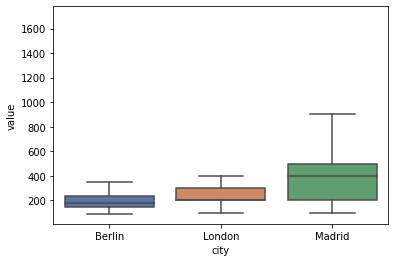

In [ ]:
sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesCO,
    fliersize=0,
    palette='deep')

### 2.4. Second Analysis:How are cities doing in terms of PM25 pollution ??

In [ ]:
AirQualityCitiesPM25=AirQualityCities[AirQualityCities['parameter']=='pm25']

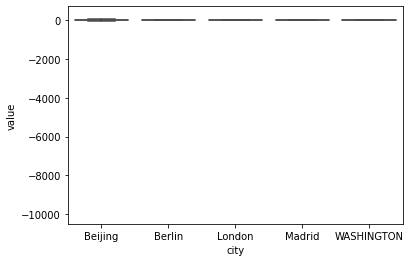

In [ ]:
sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM25,
    fliersize=0,
    palette='deep')

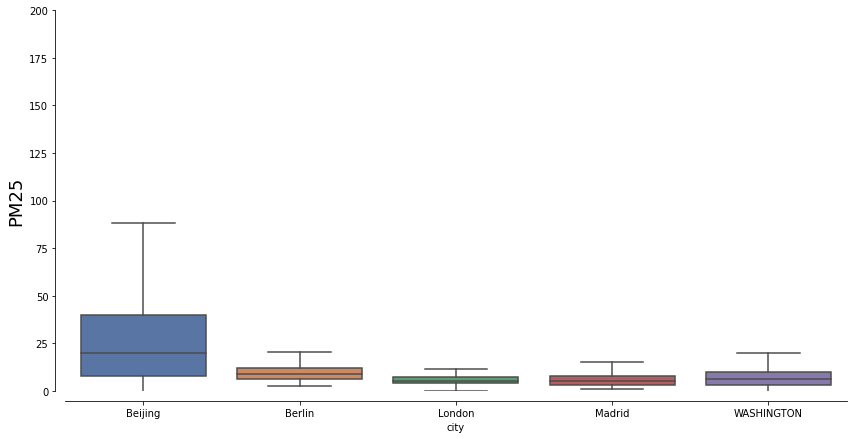

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM25,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 200])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

### 2.5. Third Analysis:How are cities doing in terms of PM10 pollution ??

In [ ]:
AirQualityCitiesPM10=AirQualityCities[AirQualityCities['parameter']=='pm10']

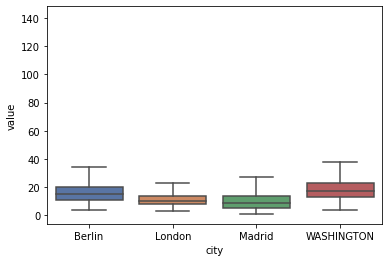

In [ ]:
sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep')

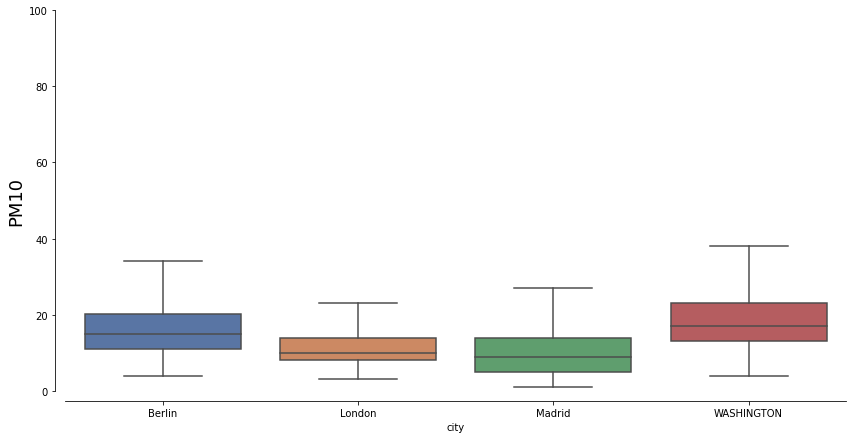

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 100])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()